In [1]:
# Import Dependencies 
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("../Resources/College_Data.csv")
df.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# Drop the unbeneficial Column
df =df.drop(columns=["Private","Name"])
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# Use Pandas to create new DataFrame name X
X = pd.DataFrame(df)
X.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
# Standardize all of the data from the X DataFrame. 
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

In [6]:
# Applying PCA to reduce dimensions to 90%
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [7]:
X_pca

array([[-1.59285540e+00,  7.67333407e-01, -1.01073483e-01],
       [-2.19240180e+00, -5.78829788e-01,  2.27879736e+00],
       [-1.43096372e+00, -1.09281870e+00, -4.38092718e-01],
       ...,
       [-7.32560593e-01, -7.72354279e-02, -4.05972181e-04],
       [ 7.91932737e+00, -2.06832966e+00,  2.07356194e+00],
       [-4.69508063e-01,  3.66660889e-01, -1.32891450e+00]])

In [8]:
# Transform PCA data to a DataFrame
pcs_df  = pd.DataFrame(data=X_pca, columns=["PC 1", "PC 2","PC 3"])
pcs_df.head()

,PC 1,PC 2,PC 3
0,-1.592855,0.767333,-0.101073
1,-2.192402,-0.578830,2.278797
2,-1.430964,-1.092819,-0.438093
3,2.855557,-2.630613,0.141723
4,-2.212008,0.021632,2.387031


In [9]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917])

In [10]:
# Create an elbow curve to find the best value for K, and use the pcs_df DataFrame.
# Find the best value for K
inertia = []
z = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
	km = KMeans(n_clusters=i, random_state=0)
	km.fit(pcs_df)
	inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

In [11]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=135)

In [12]:
tsne_features = tsne.fit_transform(X)

In [13]:
tsne_features.shape

(777, 2)

In [14]:
# Prepare to plot the dataset

# The first column of transformed features
X['x'] = tsne_features[:,0]

# The second column of transformed features
X['y'] = tsne_features[:,1]

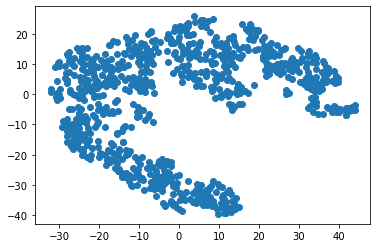

In [15]:
# Visualize the clusters
plt.scatter(X['x'], X['y'])
plt.show()

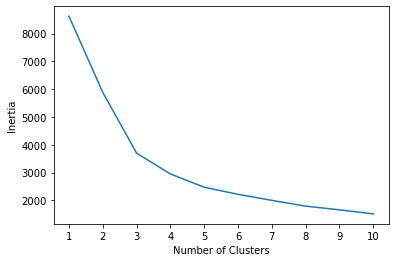

In [16]:
# plot the elbow to evaluate where the k is
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [17]:
# Predicting clusters with k=5

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

# Add the predicted class column to the dataframe
pcs_df["class"] = model.labels_
pcs_df.head()

,PC 1,PC 2,PC 3,class
0,-1.592855,0.767333,-0.101073,2
1,-2.192402,-0.578830,2.278797,2
2,-1.430964,-1.092819,-0.438093,2
3,2.855557,-2.630613,0.141723,1
4,-2.212008,0.021632,2.387031,2


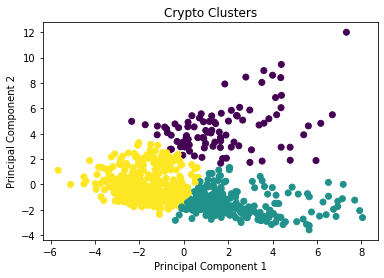

In [18]:
# Visualize the clusters
plt.scatter(x=pcs_df['PC 1'], y=pcs_df['PC 2'], c=pcs_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Crypto Clusters')
plt.show()